# Fit

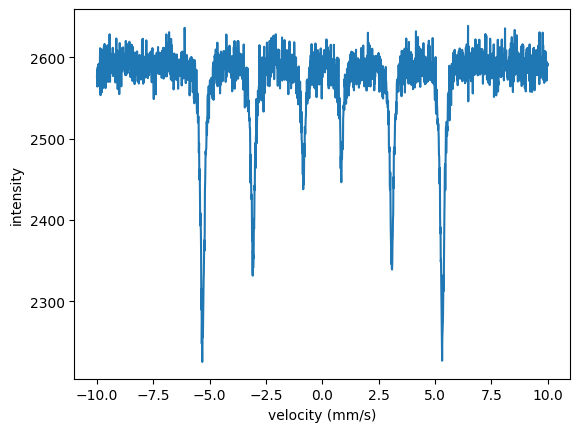

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('example_spectrum.txt')

velocity_experiment = data[:,0]
intensity_experiment = data[:,1]

plt.plot(velocity_experiment, intensity_experiment)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

In [2]:
site = nx.Hyperfine(magnetic_field = nx.Var(value = 31, min = 25, max = 35, fit = True, id = "magnetic field"),
                    isotropic = True
                    )

layer_Fe = nx.Layer(id = "Fe",
                    material = nx.Material.Template(nx.lib.material.Fe),
                    thickness = 3000,  # in nanometer
                    roughness = 100,  # in nanometer
                    )

layer_Fe.material.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam  = nx.Beam()
beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57
                    )

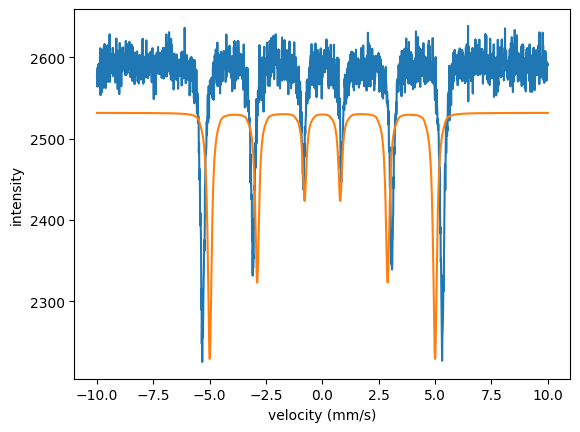

In [3]:
spectrum = nx.MoessbauerSpectrum(exp,
                                 velocity = velocity_experiment,  # the measured detuning points
                                 intensity_data = intensity_experiment,  # the intensity data to be fit
                                 )

# calculate the intensity from the assumed model
# the data are returned by the function
intensity = spectrum.Calculate()

#%matplotlib qt
plt.plot(velocity_experiment, intensity_experiment)
plt.plot(velocity_experiment, intensity)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

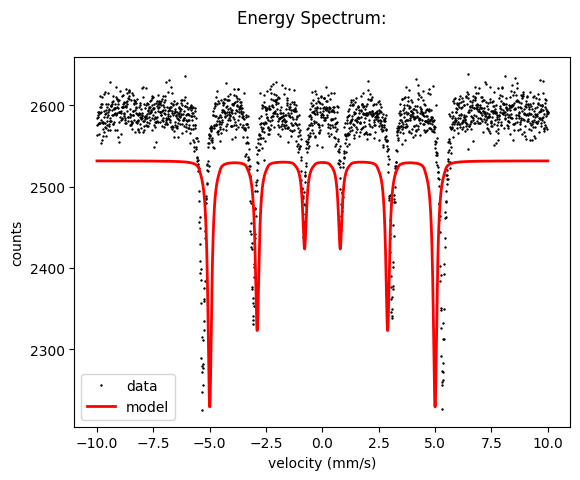

In [4]:
spectrum.Plot(velocity = True)

In [5]:
# create a fit object with a list of measurments to be fit.
fit = nx.Fit(measurements = [spectrum])

# run the fit
fit.Evaluate()


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 3 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             2638.74 |                0 |           263874
    1 |                    ES backgr |             257.138 |                0 |          25713.8
    2 |               magnetic field |                  31 |               25 |               35

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 6, Initial cost: 6.760795e+02, Final cost: 2.142308e+01, Termination: CONVERGENCE

Gradient error analysis.


Fit performed with algorithm:
LevMar
Error analysis:
Gradient

Using 3 fit parameter(s):

  no. |                           id |          fit value |   +/- std dev | initial value |          min |          max
    0 |                   ES 

32.9955068853677


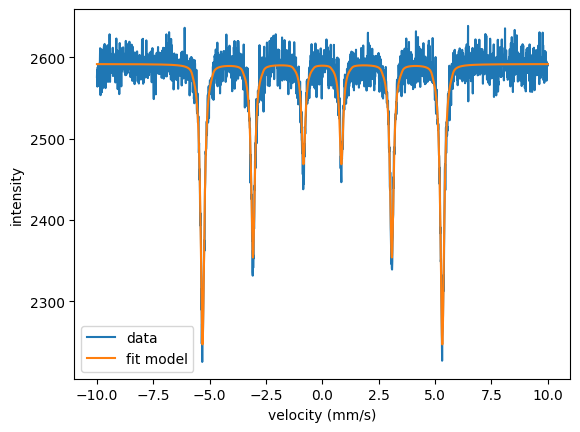

In [6]:
# now the Var.values are the fitted values.

# print the fitted value
print(site.magnetic_field.value)

# and plot the data
#%matplotlib qt
plt.plot(velocity_experiment, intensity_experiment, label = 'data')  # the 'measured' data
plt.plot(velocity_experiment, spectrum.result , label = 'fit model') # our assumed model
plt.legend()
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()



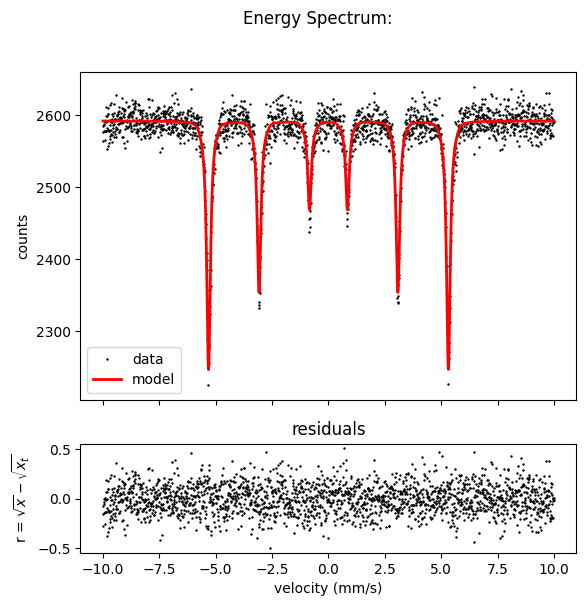

In [7]:
spectrum.Plot(velocity = True, residuals=True, datacolor='black', 
           theorycolor='r', theorywidth=2, datalinestyle='none', datamarker='+',
           datamarkersize=2, datafillstyle='full', legend=True,
           errors= False)

31.0

Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 3 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             2638.74 |                0 |           263874
    1 |                    ES backgr |             257.138 |                0 |          25713.8
    2 |               magnetic field |                  31 |               25 |               35

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling Pagmo solver with fit method PagmoDiffEvol

  population: 40
  iterations: 100

  cost = 2.136878e+01

Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 1, Initial cost: 2.136878e+01, Final cost: 2.136878e+01, Termination: CONVERGENCE

Gradient error analysis.


Fit performed with algorithm:
PagmoDiffEvol
Local algorithm:
LevMar
Error analysis:
Gradient

Using 3 fit parameter(s):

  

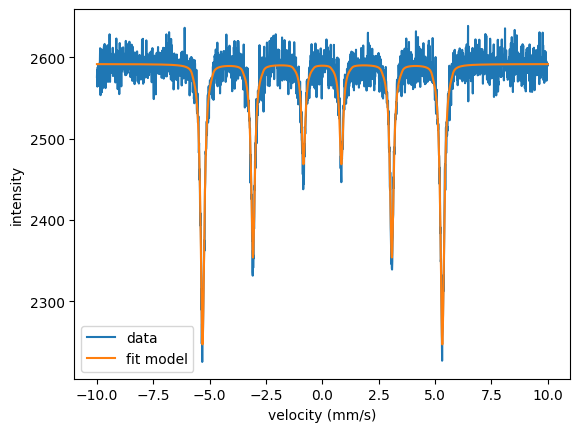

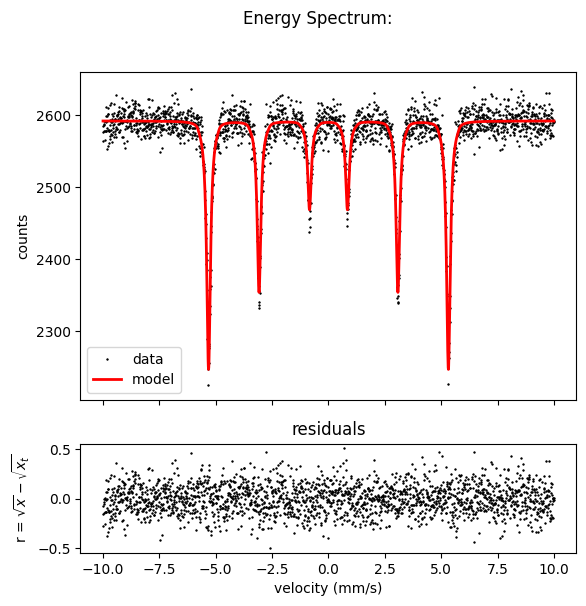

In [8]:
# we set all fit parameters back to their inital values to start with the same conditions.
# there is a special method for this
fit.SetInitialVars()
    
print(site.magnetic_field.value)

# change the method in the fit.options
fit.options.method = "PagmoDiffEvol"
    
# because we want ot apply a global fit method we have to provide a range for the intensity scaling value
# spectrum.scaling = nx.Var(value = 1, min = 0, max = 1e4, fit = True, id = "scaling factor")

fit.Evaluate()

# and plot the data
plt.plot(velocity_experiment, intensity_experiment, label = 'data')  # the 'measured' data
plt.plot(velocity_experiment, spectrum.result , label = 'fit model') # our fit model
plt.legend()
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()
    
spectrum.Plot(velocity =True)